<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Решающие-деревья" data-toc-modified-id="Решающие-деревья-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Решающие деревья</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Градиентный-бустинг-(Catboost)" data-toc-modified-id="Градиентный-бустинг-(Catboost)-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Градиентный бустинг (Catboost)</a></span></li><li><span><a href="#Градиентный-бустинг-(LightGBM)" data-toc-modified-id="Градиентный-бустинг-(LightGBM)-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Градиентный бустинг (LightGBM)</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import seaborn as sns
import time 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import lightgbm as lgb
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.stattools import adfuller  # Импорт adfuller
from statsmodels.tsa.stattools import kpss      # Импорт kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
taxi = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
taxi.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
taxi.isna().sum()

num_orders    0
dtype: int64

In [6]:
taxi.duplicated().sum()

26415

In [7]:
#taxi = taxi.drop_duplicates()

In [8]:
taxi.index.is_monotonic

True

In [9]:
taxi = taxi.resample('1H').sum()

На этом этапе мы провели краткий обзор данных, проверили индекс на монотонность, а также сделали ресемплинг

## Анализ

Взглянем на общий график временного ряда

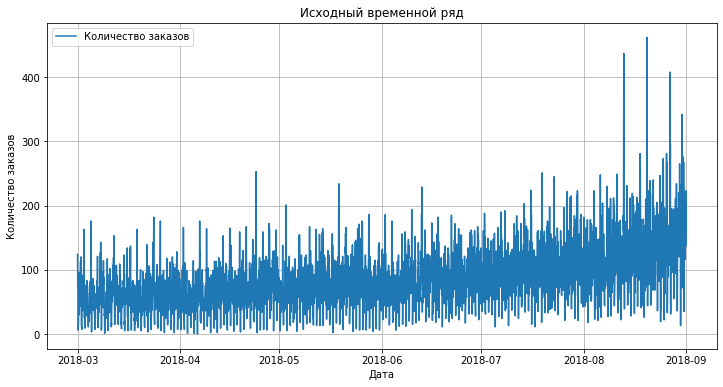

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(taxi.index, taxi['num_orders'], linestyle='-', label='Количество заказов')
plt.title('Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
sns.set(rc={'figure.figsize':(15,6)})

def graph(data, title):
    data.plot()
    plt.title(title)
    plt.show()

In [12]:
decomposed = seasonal_decompose(taxi)

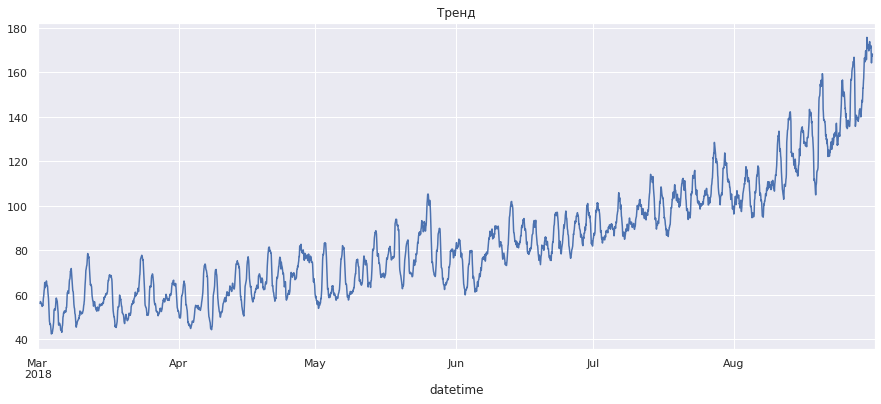

In [13]:
graph(decomposed.trend, 'Тренд')

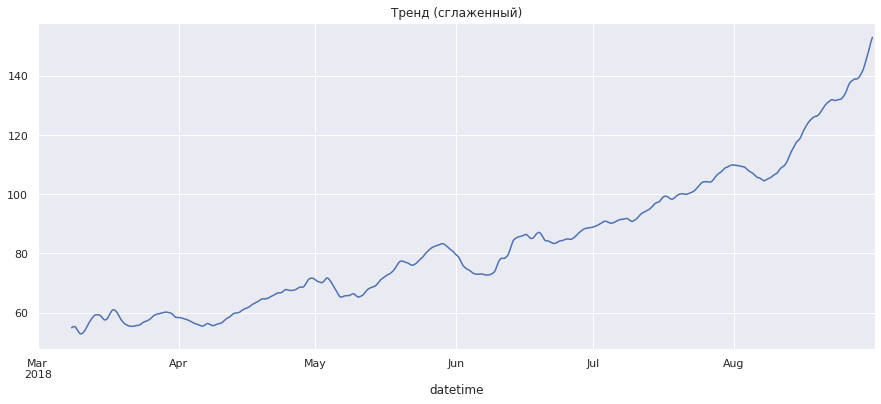

In [14]:
graph(decomposed.trend.rolling(24*7).mean(), 'Тренд (сглаженный)')

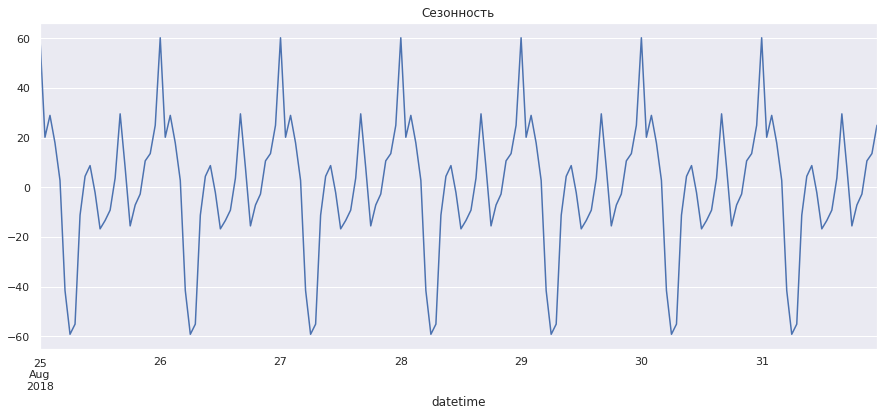

In [15]:
graph(decomposed.seasonal.tail(24*7), 'Сезонность')

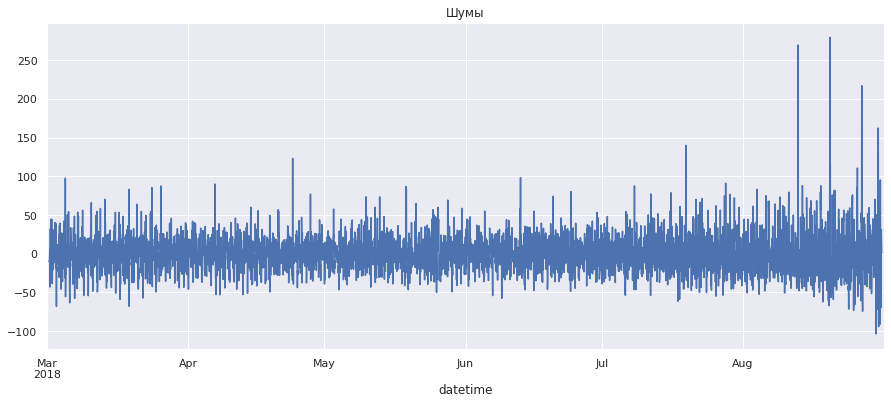

In [16]:
graph(decomposed.resid, 'Шумы')

+ Мы можем заметить тренд равномерного роста заказов с периодическими небольшими падениями
+ Присутствует сезонность по дням - спад ночью, рост с утра и днем, пик к вечеру

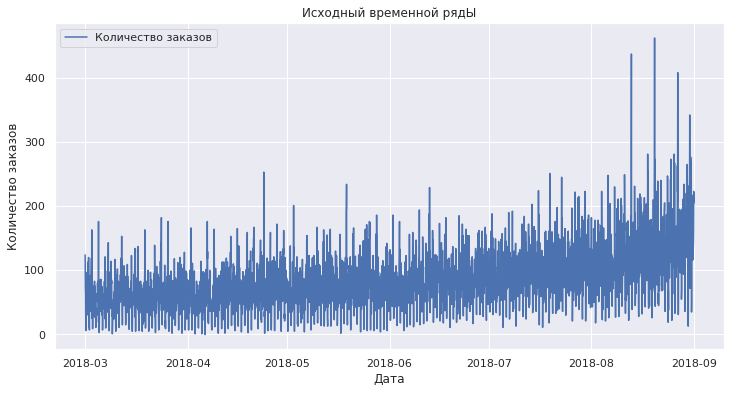

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(taxi.index, taxi['num_orders'], linestyle='-', label='Количество заказов')
plt.title('Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def check_stationarity(series):
    # ADF тест
    print("ADF тест:")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print("Критические значения:")
    for key, value in adf_result[4].items():
        print(f"{key}: {value:.4f}")
    print("Вывод:", "Ряд стационарный (отвергаем H0)" if adf_result[1] < 0.05 else "Ряд нестационарный (не отвергаем H0)")
    
    # KPSS тест
    print("KPSS тест:")
    kpss_result = kpss(series, regression='c')
    print(f"KPSS Statistic: {kpss_result[0]:.4f}")
    print(f"p-value: {kpss_result[1]:.4f}")
    print("Критические значения:")
    for key, value in kpss_result[3].items():
        print(f"{key}: {value:.4f}")
    print("Вывод:", "Ряд нестационарный (отвергаем H0)" if kpss_result[1] < 0.05 else "Ряд стационарный (не отвергаем H0)")

check_stationarity(taxi['num_orders'])

ADF тест:
ADF Statistic: -3.0689
p-value: 0.0289
Критические значения:
1%: -3.4318
5%: -2.8622
10%: -2.5671
Вывод: Ряд стационарный (отвергаем H0)
KPSS тест:
KPSS Statistic: 10.9134
p-value: 0.0100
Критические значения:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Вывод: Ряд нестационарный (отвергаем H0)


+ Ряд нестационарен из-за тренда и сезонности (подтверждают графики и KPSS).
+ ADF "не увидел" это, так как он чувствителен только к стохастической нестационарности, то есть ряд не имеет стохастического тренда (единичного корня).



Так как нестационарность является частью гипотезы, то устранять нестационарность мы не будем 

## Обучение

#### Подготовка данных

Сначала построим графики ACF (автокорреляция) и PACF (частичная автокорреляция) и попробуем определить оптимальное количество лагов и размер окна.

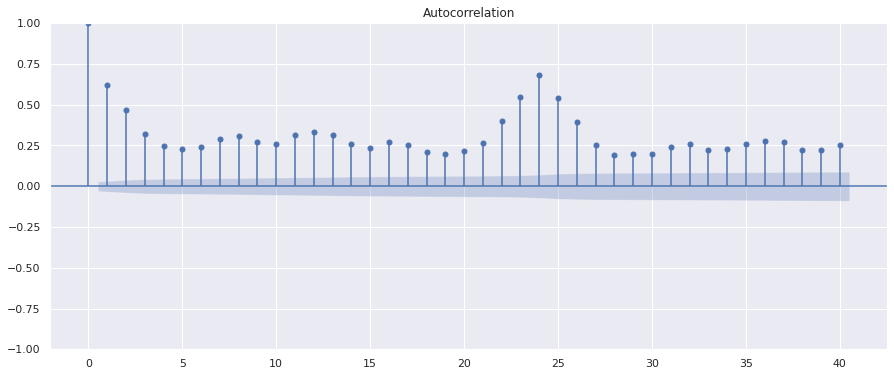

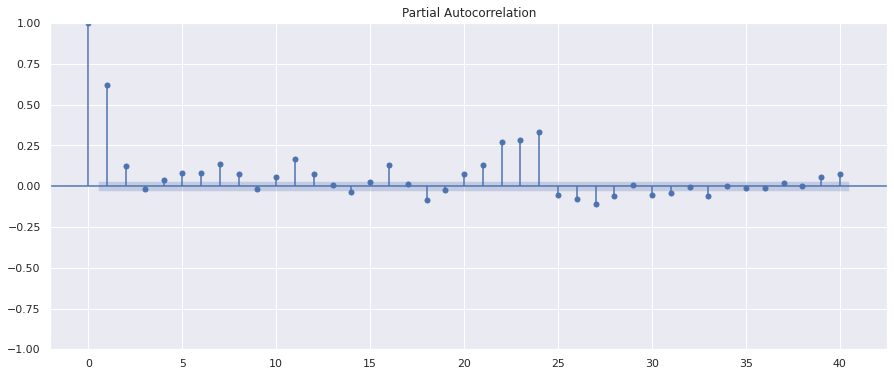

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(taxi['num_orders'], lags=40)
plot_pacf(taxi['num_orders'], lags=40)
plt.show()

+ Оптимальное кол-во лагов - 2 (из PACF), так как на PACF-графике первые два лага (1 и 2) сильно выделяются и выходят за границы доверительного интервала. После 2-го лага значения становятся близкими к нулю - следовательно, дальнейшие лаги дают незначительный вклад.
+ На ACF-графике виден сильный пик примерно на лаге 24, что предполагает сезонность с периодом 24


In [20]:
def get_features(taxi_learning):
    taxi_learning['dayofweek'] = taxi_learning.index.dayofweek
    taxi_learning['hour'] = taxi_learning.index.hour

    for lag in range(1, 3):  
        taxi_learning[f'lag_{lag}'] = taxi_learning['num_orders'].shift(lag)
    
    taxi_learning['rolling_mean'] = taxi_learning['num_orders'].shift().rolling(window=24).mean()

    taxi_learning.dropna(inplace=True)

    return taxi_learning


In [21]:
taxi_learning = taxi.copy()
taxi_learning = get_features(taxi_learning)

In [22]:
taxi.shape

(4416, 1)

In [23]:
taxi_learning.shape

(4392, 6)

In [24]:
features = taxi_learning.drop(['num_orders'], axis=1) 
target = taxi_learning['num_orders']

In [25]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            shuffle=False, 
                                                                            test_size=0.1, 
                                                                            random_state=42)

### Обучение моделей 

#### Линейная регрессия 

In [26]:
train_models = []

In [27]:
model = LinearRegression()

In [28]:
start_time = time.time()
model.fit(features_train, target_train)
training_time = time.time() - start_time
predictions = model.predict(features_train)

In [29]:
rmse = mean_squared_error(target_train, predictions, squared=False)
rmse

30.887638490679436

In [30]:
train_models.append([model, rmse, training_time])

#### Решающие деревья

In [31]:

model = DecisionTreeRegressor(random_state=42)

In [32]:
parameters = {'n_estimators':range(50,100,10), 'max_depth':range(1,11,2)}
parameters = {'max_depth':range(1,11,2)}

tscv = TimeSeriesSplit(n_splits=2)

In [33]:
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=parameters)

In [34]:
start_time = time.time()
gsearch.fit(features_train, target_train)
training_time = time.time() - start_time
gsearch.best_params_

{'max_depth': 7}

In [35]:
predictions = gsearch.predict(features_train)
rmse = mean_squared_error(target_train, predictions, squared=False)
rmse

22.43454122503601

In [36]:
train_models.append([gsearch, rmse, training_time])

#### Модель случайного леса 

In [37]:
model = RandomForestRegressor(random_state=12345)

In [38]:
parameters = {'n_estimators':range(50,100,10), 'max_depth':range(1,11,2)}

tscv = TimeSeriesSplit(n_splits=2)

In [39]:
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=parameters)

In [40]:
start_time = time.time()
gsearch.fit(features_train, target_train)
training_time =  time.time() - training_time
gsearch.best_params_

{'max_depth': 9, 'n_estimators': 60}

In [41]:
predictions = gsearch.predict(features_train)
rmse = mean_squared_error(target_train, predictions, squared=False)
rmse

17.63954127439009

In [42]:
train_models.append([gsearch, rmse, training_time])

#### Градиентный бустинг (Catboost)

In [43]:
model = CatBoostRegressor(verbose=False)

In [44]:
start_time = time.time()
model.fit(features_train, target_train, verbose = False)
training_time = time.time() - start_time  # Вычисляем время обучения
predictions = model.predict(features_train)

In [45]:
rmse = mean_squared_error(target_train, predictions, squared=False)
rmse

15.351984816301632

In [46]:
train_models.append([model, rmse, training_time])

#### Градиентный бустинг (LightGBM)

In [47]:
model = lgb.LGBMRegressor()

In [48]:
start_time = time.time()
model.fit(features_train, target_train, verbose=False)
training_time = time.time() - start_time
predictions = model.predict(features_train)

In [49]:
rmse = mean_squared_error(target_train, predictions, squared = False)
rmse 

16.43555106801566

In [50]:
train_models.append([model, rmse, training_time])

#### Результаты

In [51]:
result = pd.DataFrame(train_models, columns=['model', 'rmse_train', 'training_time'])

In [52]:
pd.options.display.max_colwidth = 0

In [53]:
display(result.sort_values(by='rmse_train'))

,model,rmse_train,training_time
3,<catboost.core.CatBoostRegressor object at 0x7f4a5c036820>,15.351985,2.278932e+00
4,LGBMRegressor(),16.435551,1.183573e+00
2,"GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),\n estimator=RandomForestRegressor(random_state=12345),\n param_grid={'max_depth': range(1, 11, 2),\n 'n_estimators': range(50, 100, 10)})",17.639541,1.748341e+09
1,"GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),\n estimator=DecisionTreeRegressor(random_state=42),\n param_grid={'max_depth': range(1, 11, 2)})",22.434541,9.219027e-02
0,LinearRegression(),30.887638,3.515244e-03


Как мы можем заметить, лучше всего себя проявил **CatBoost** (что вполне закономерно). Теперь посмотрим на тестовой выборке

## Тестирование

Возьмем нашу наилучшую модель и проверим уже на реальных данных

In [54]:
def display_result(target, pred, rmse, model_info=None):
    result = target.to_frame().reset_index()
    result['prediction'] = pd.Series(pred)
    result.set_index('datetime', inplace=True)
    
    title = f'RMSE={rmse:.2f}'
    if model_info is not None:
        title = f"{model_info.get('model_name', 'Model')} | {title}"
    
    graph(result, title)

In [55]:
model = CatBoostRegressor(verbose=False)
model.fit(features_train, target_train, verbose=False)

predictions = model.predict(features_test)

rmse = mean_squared_error(target_test, predictions, squared=False)
model_info = {
    'model_name': 'CatBoost'
}

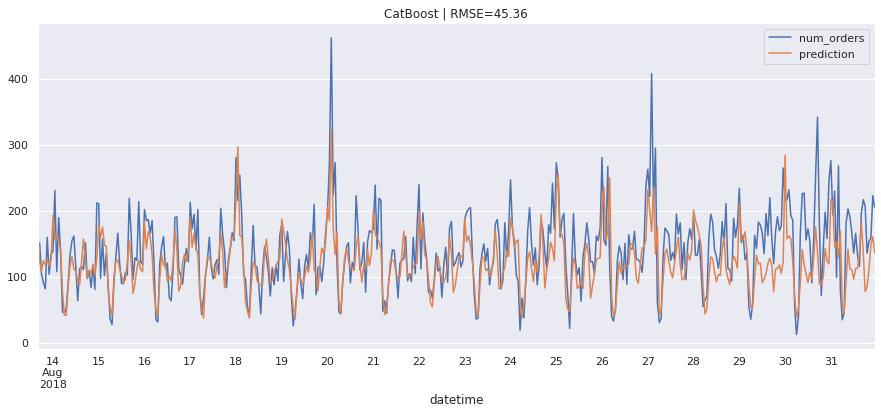

In [56]:
display_result(target_test, predictions, rmse, model_info)

Под условие задачи модель подходит (**RMSE < 48**). Также можно обратить внимание, что на **train** метрика **rmse** значительно ниже, что может указывать на то, модели градиентного бустинга переобучилась. 

## Вывод

В ходе анализа временного ряда количества заказов такси были выявлены ключевые закономерности, влияющие на поведение данных. 

+ График тренда показал устойчивый рост спроса на протяжении исследуемого периода, что свидетельствует о росте активности пользователей. 
+ Сезонная компонента имеет чётко выраженный суточный ритм, повторяющийся с периодичностью в 24 часа, что отражает характерные пики и спады активности в течение дня.

На основе полученных признаков была построена модель градиентного бустинга **CatBoost**, которая продемонстрировала наилучшие результаты среди протестированных алгоритмов. Модель показала низкое значение ошибки RMSE (**45.36**) и адекватно справилась с задачей прогноза (**RMSE < 48**)


Рекомендации по увеличения точности предсказания спроса на такси:

+ Дополнить признаки: добавить погодные условия, тип дня (праздник/выходной), особые события и т.п
+ Актуализировать модель по мере поступления новых данных
+ Разделить предсказания по геолокациям, что позволило бы локально адаптировать предложение такси


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48